# Visualize common GCAM and Demeter run data


## Load packages

In [16]:
%matplotlib inline

import os
import pandas as pd

import im3vis

## Set up paths to data and other info

In [17]:
# target year you wish to examine
target_year = '2020'

# directory containing demeter input and output directories
demeter_dir = '/Users/d3y010/projects/msd_live/gcam_demeter_demo/demeter_data'

# directory containing Demeter's GCAM projected land allocation file
projected_dir = os.path.join(demeter_dir, 'inputs', 'projected')

# Demeter's GCAM projected land allocation file
gcam_projected_file = os.path.join(projected_dir, 'gcam_ref_scenario_reg32_basin235_v5p1p3.csv')

# a Pandas data frame of GCAM's projected land allocation data
gcam_df = pd.read_csv(gcam_projected_file)

## GCAM total land allocation by region for all land classes

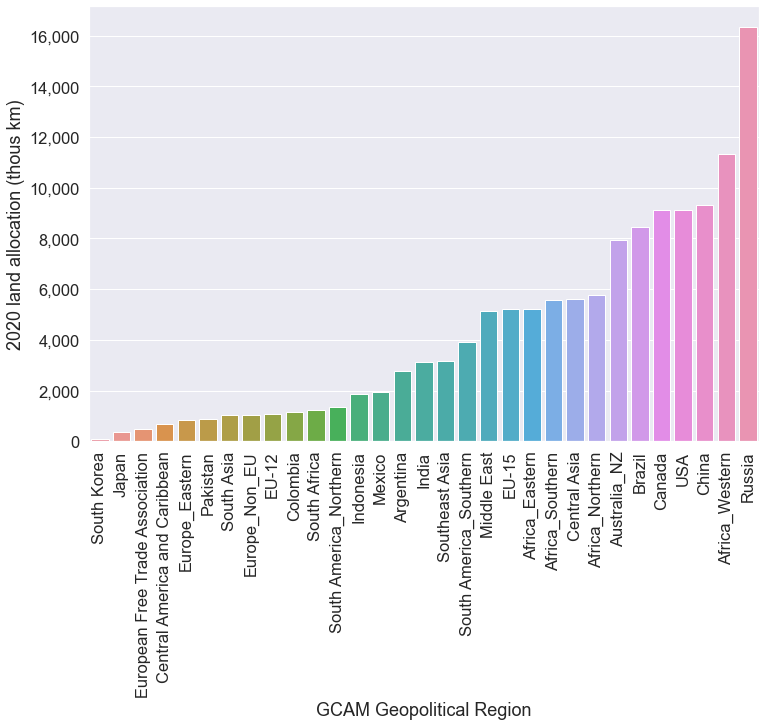

In [18]:
reg_ax = im3vis.gcam_demeter_region(gcam_df, target_year)

## GCAM total land allocation by region for combined Corn and Wheat

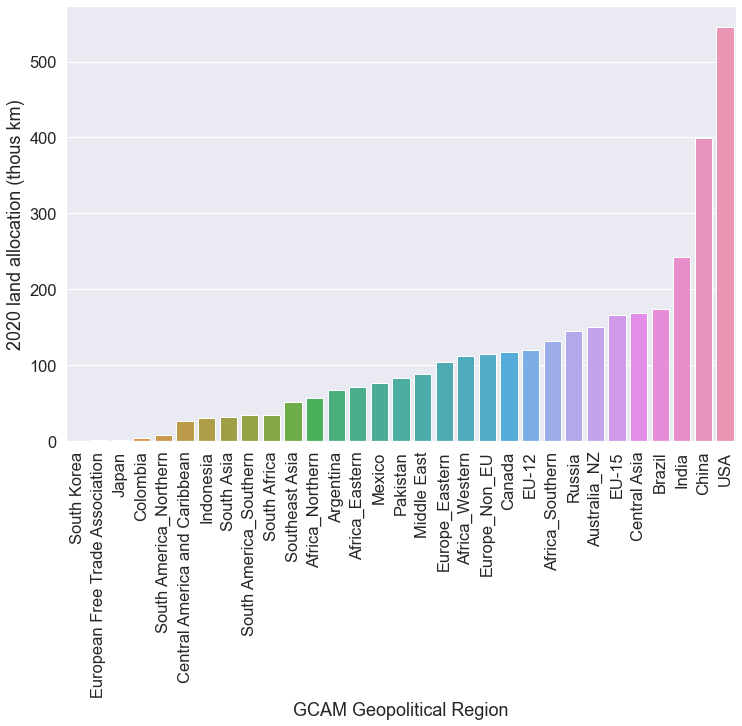

In [20]:
reg_ax = im3vis.gcam_demeter_region(gcam_df, target_year, landclass_list=['Corn', 'Wheat'])

## GCAM change in forest land from 2020
